<a href="https://colab.research.google.com/github/Sushmitha-Katti/EVA-4/blob/master/Session12/S12-AssignmentA/FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install the required libraries**

In [12]:
!pip install --no-cache-dir git+https://github.com/albu/albumentations > /dev/null && echo "Albumentation library is successfully installed!"
!git clone https://github.com/Sushmitha-Katti/PyTNet 
import sys
sys.path.append("PyTNet")

  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-jpsywnox
Albumentation library is successfully installed!
fatal: destination path 'PyTNet' already exists and is not an empty directory.


## **Importing Required files**

In [0]:
import torch
import train_test_loader
import show_images
import train_test
import evaluate
from Albumentationtransform import AlbumentationTransforms
from GradCam import GradCAM,visualize_cam
from LR_Range_Test import LR_test
from tinyimagenet import TinyImageNetDataSet
from Models import ResnetModel

## **Load Data , spit and apply transforms**

In [4]:
import albumentations as A
import cv2
channel_means = (0.442,0.442,0.442)
channel_stdevs = (0.278, 0.278, 0.278)
train_transform = AlbumentationTransforms([       
                                                                
                                      A.HorizontalFlip(p = 0.7),
                                      A.PadIfNeeded(min_height=70, min_width=70, border_mode=4, value=None, mask_value=None, always_apply=False, p=1.0),
                                      A.RandomCrop(64, 64, always_apply=False, p=1.0),
                                      A.Rotate(limit=30, interpolation=1, border_mode=4, value=None, mask_value=None, always_apply=False, p=0.5),
                                      A.Normalize(mean=channel_means, std=channel_stdevs),
                                      A.Cutout(num_holes=1, max_h_size=32,max_w_size = 32,p=0.7) 
                                       ])
test_transform = AlbumentationTransforms([A.Normalize(mean=channel_means, std=channel_stdevs)])
train_dataset , test_dataset,classes = TinyImageNetDataSet(train_split = 70,test_transforms = test_transform,train_transforms = train_transform)

## **DataLoader**

In [0]:
trainloader, testloader = train_test_loader.load(train_dataset,test_dataset,batch_size=256)

## **Print the summary**

In [7]:
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResnetModel.ResNet18(num_classes=200).to(device)
summary(model, input_size=(3, 64, 64))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

## **Initialise Optimiser,Scheduler, Criterion**

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR,StepLR

optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9,weight_decay = 0.0001,nesterov = True ) 
criterion = nn.CrossEntropyLoss()
scheduler = OneCycleLR(optimizer, max_lr = 0.02, total_steps=None, epochs=30, steps_per_epoch=len(trainloader), pct_start=1/3, anneal_strategy='linear', cycle_momentum=True, base_momentum=0.85, max_momentum=0.95, div_factor=10.0,final_div_factor =10)


## **Train Model**

In [11]:

train_test.train_model(model,device,trainloader,testloader,optimizer,criterion,30,scheduler,batch_scheduler=True,best_acc = 0,path = "newtinymodel.pt")

EPOCH: 1 LR: 0.002




Test set: Average loss: 0.0165, Accuracy: 3559/33000 (10.78%)

accuracy increased, Saving model....
EPOCH: 2 LR: 0.0038005982053838485




Test set: Average loss: 0.0157, Accuracy: 4357/33000 (13.20%)

accuracy increased, Saving model....
EPOCH: 3 LR: 0.005601196410767697




Test set: Average loss: 0.0159, Accuracy: 4791/33000 (14.52%)

accuracy increased, Saving model....
EPOCH: 4 LR: 0.007401794616151546




Test set: Average loss: 0.0138, Accuracy: 7418/33000 (22.48%)

accuracy increased, Saving model....
EPOCH: 5 LR: 0.009202392821535395




Test set: Average loss: 0.0126, Accuracy: 8986/33000 (27.23%)

accuracy increased, Saving model....
EPOCH: 6 LR: 0.011002991026919245




Test set: Average loss: 0.0128, Accuracy: 8748/33000 (26.51%)

EPOCH: 7 LR: 0.012803589232303092




Test set: Average loss: 0.0131, Accuracy: 8951/33000 (27.12%)

EPOCH: 8 LR: 0.01460418743768694




Test set: Average loss: 0.0118, Accuracy: 10530/33000 (31.91%)

accuracy increased, Saving model....
EPOCH: 9 LR: 0.01640478564307079




Test set: Average loss: 0.0109, Accuracy: 11477/33000 (34.78%)

accuracy increased, Saving model....
EPOCH: 10 LR: 0.01820538384845464




Test set: Average loss: 0.0111, Accuracy: 11711/33000 (35.49%)

accuracy increased, Saving model....
EPOCH: 11 LR: 0.01999671096345515




Test set: Average loss: 0.0108, Accuracy: 12248/33000 (37.12%)

accuracy increased, Saving model....
EPOCH: 12 LR: 0.01900671096345515




Test set: Average loss: 0.0100, Accuracy: 12888/33000 (39.05%)

accuracy increased, Saving model....
EPOCH: 13 LR: 0.01801671096345515




Test set: Average loss: 0.0100, Accuracy: 13291/33000 (40.28%)

accuracy increased, Saving model....
EPOCH: 14 LR: 0.01702671096345515




Test set: Average loss: 0.0096, Accuracy: 13895/33000 (42.11%)

accuracy increased, Saving model....
EPOCH: 15 LR: 0.01603671096345515




Test set: Average loss: 0.0094, Accuracy: 14291/33000 (43.31%)

accuracy increased, Saving model....
EPOCH: 16 LR: 0.01504671096345515




Test set: Average loss: 0.0089, Accuracy: 15203/33000 (46.07%)

accuracy increased, Saving model....
EPOCH: 17 LR: 0.014056710963455149




Test set: Average loss: 0.0092, Accuracy: 14670/33000 (44.45%)

EPOCH: 18 LR: 0.01306671096345515




Test set: Average loss: 0.0093, Accuracy: 14536/33000 (44.05%)

EPOCH: 19 LR: 0.012076710963455148




Test set: Average loss: 0.0087, Accuracy: 15615/33000 (47.32%)

accuracy increased, Saving model....
EPOCH: 20 LR: 0.011086710963455149




Test set: Average loss: 0.0090, Accuracy: 15365/33000 (46.56%)

EPOCH: 21 LR: 0.010096710963455147




Test set: Average loss: 0.0082, Accuracy: 16685/33000 (50.56%)

accuracy increased, Saving model....
EPOCH: 22 LR: 0.00910671096345515




Test set: Average loss: 0.0084, Accuracy: 16219/33000 (49.15%)

EPOCH: 23 LR: 0.008116710963455148




Test set: Average loss: 0.0079, Accuracy: 17155/33000 (51.98%)

accuracy increased, Saving model....
EPOCH: 24 LR: 0.00712671096345515




Test set: Average loss: 0.0079, Accuracy: 17087/33000 (51.78%)

EPOCH: 25 LR: 0.006136710963455149




Test set: Average loss: 0.0076, Accuracy: 17390/33000 (52.70%)

accuracy increased, Saving model....
EPOCH: 26 LR: 0.005146710963455148




Test set: Average loss: 0.0076, Accuracy: 17740/33000 (53.76%)

accuracy increased, Saving model....
EPOCH: 27 LR: 0.00415671096345515




Test set: Average loss: 0.0076, Accuracy: 17892/33000 (54.22%)

accuracy increased, Saving model....
EPOCH: 28 LR: 0.0031667109634551487




Test set: Average loss: 0.0073, Accuracy: 18406/33000 (55.78%)

accuracy increased, Saving model....
EPOCH: 29 LR: 0.002176710963455151




Test set: Average loss: 0.0071, Accuracy: 18791/33000 (56.94%)

accuracy increased, Saving model....
EPOCH: 30 LR: 0.0011867109634551495




Test set: Average loss: 0.0069, Accuracy: 19037/33000 (57.69%)

accuracy increased, Saving model....


In [0]:
Lr = train_test.LR

## **PLot LR Curve**

No handles with labels found to put in legend.


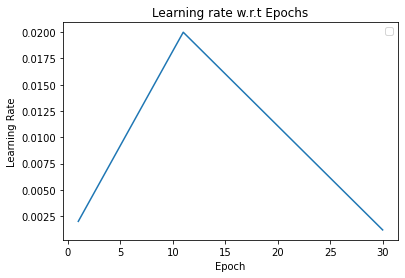

In [25]:
import numpy as np
curves = [{"x":np.arange(1,31), "y": Lr, "label": "","xlabel": "Epoch", "ylabel":"Learning Rate"}]
evaluate.plot_curve(curves,"Learning rate w.r.t Epochs",Figsize = (6,4))

## **Accuracy Curve**

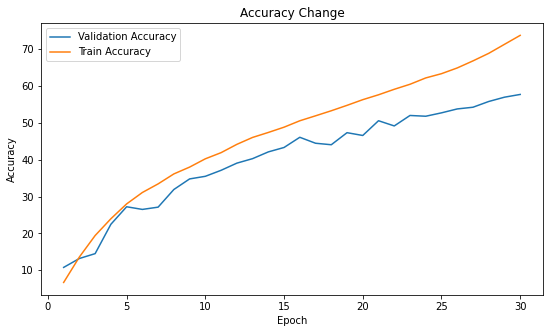

In [26]:

curves = [{"x":np.arange(1,31),"y":train_test.test_acc , "label": "Validation Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },
          {"x":np.arange(1,31),"y":train_test.train_acc , "label": "Train Accuracy","xlabel": "Epoch", "ylabel":"Accuracy" },
]
evaluate.plot_curve(curves,"Accuracy Change",Figsize = (9,5))

## **Get the words format of Classes**

In [0]:
url = "tiny-imagenet-200/words.txt"
f = open(url, "r")
words = [None] * 200
for line in f:
  wordclass = line.strip('\n').split('\t')[0]

  if wordclass in classes:
    i = classes.index(line.strip('\n').split('\t')[0])
    words[i] = line.strip('\n').split('\t')[1]


## **GradCam On All 4 Layers**

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or 

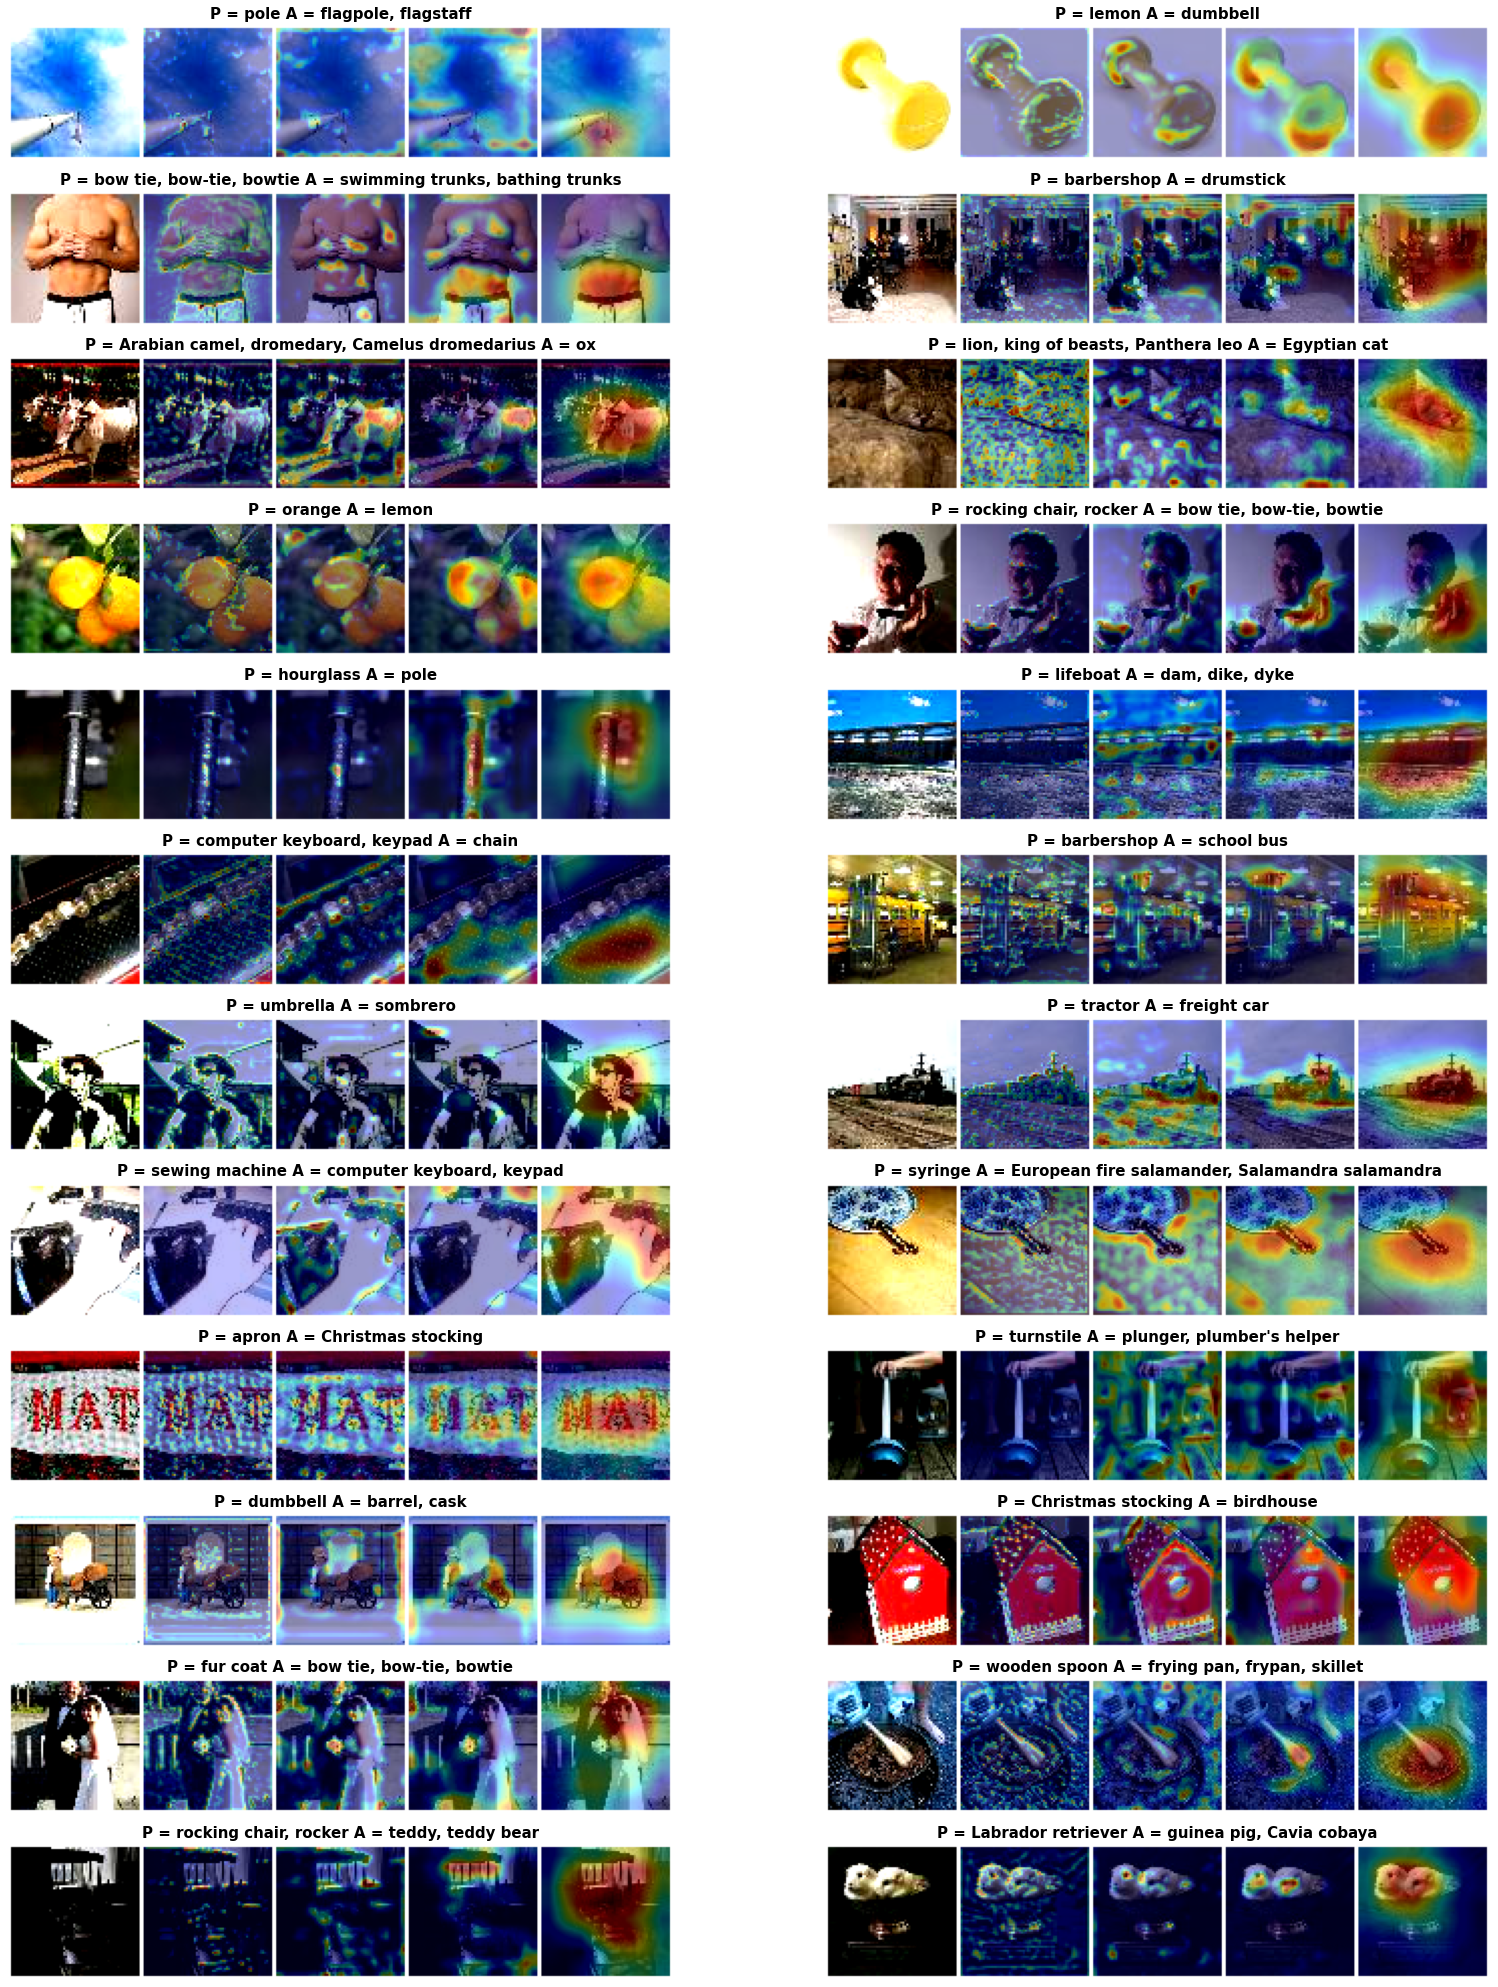

In [58]:
from GradCam import GradCamView
layers = [model.layer1, model.layer2, model.layer3, model.layer4]
miscalssified_images = evaluate.show_misclassified_images(model, device, testloader, words)
GradCamView(miscalssified_images,model,words,layers,Figsize = (23,30),subplotx1 = 13, subplotx2 = 2)